**Note:** this is a continuation of Part A of this project's documentation, which should be included alongside this document. Please refer to that document for project boilerplate, execution instructions and requirements, and other projectwide information.

## Part B – Errors in a Forward Finite Difference Approximation

Part B of this project concerns itself with forward difference estimates, used to approximate the derivative for a function at a point, given the function's zeroth derivative (base function) and an "offset," which is effectively used as a $\Delta x$ value, such that as it becomes smaller, it approaches $dx$, and the value of $\delta^+ f(x)$ approaches $f'(x)$.

### Goals

In this instance, we are given the function $f(x)=x^{-3}$ where $x=3$, and we are to approximate $f'(3)$ without being able to directly use the derivative function. The increment $h=2^{-n}$ and we iterate $n=1\ldots 52$ such that $n$ shrinks, thus allowing $\delta^+ f(3)$ to approximate $f'(3)$.

### Math Background

#### Forward Finite Difference Estimate

The forward finite difference estimate as a means of approximating a derivative is defined as follows:

$$
    \delta^+ f(a) = \frac{f(a+h) - f(a)}{h}
$$

Where $a$ is the derivative value to calculate, and $h$ is the increment (the smaller, the better).

### Implementation Requirements

The requirements for this program, once parsed from the source documentation, are extremely straightforward:

#### Input Functions

The function $f(x)$, as well as $f'(x)$ and $f''(x)$, ought to be implemented somewhere in the codebase for FDE and error calculation.

$$ f(x) = x^{-3},\ f'(x) = -3x^{-4},\ f''(x) = 12x^{-5} $$

#### Forward Difference Estimate

The FDE's arithmetic should be implemented within the codebase to replicate the math as described above.

#### Error Calculation

The relative error function should be implemented as described:
$$
r = \left| \frac{f'(a)-\delta_{DP}^+ f(a)}{f'(a)} \right|
$$

The upper bound of relative error in the FDE approximating $f'(a)$ was given as follows:

$$
R = c_1 h + c_2\frac{1}{h},\ c_1=\left|\frac{f''(a)}{2f'(a)}\right|,\
c_2=\left|\frac{f(a) \epsilon_{DP}}{f'(a)}\right|
$$

### Implementation

#### Input Functions

These are implemented as `f`, `f1`, and `f2` in the C++ source.

#### Forward Difference Estimate

FDE is implemented as an extremely simple arithmetic function within the project part B file. Refer to `forwardDifferenceEstimate` in the C++ source below.

#### Error Calculation

Relative error calculation is implemented as a simple arithmetic function in `relativeError` in the source.

The upper bound function is similarly available at `relativeErrorUpperBound`.

In [1]:
%cat ../src/proj1_b.cpp

//
//  proj1_b.cpp
//  HPSCProject1
//
//  Created by Paul Herz on 9/3/16.
//  Copyright © 2016 Paul Herz. All rights reserved.
//

#include <iostream>
#include <cmath>

#include "Vector.h"

using namespace PH;


// System double-precision epsilon.
// determined to be 2^-52 during testing.
double EDP = __DBL_EPSILON__;


double f(double x) {
	return std::pow(x, -3.0);
}


double f1(double x) {
	// first derivative of f(x)
	return -3.0 * std::pow(x, -4.0);
}


double f2(double x) {
	// second derivative of f(x)
	return 12 * std::pow(x, -5.0);
}


double forwardDifferenceEstimate(double a, double h) {
	// for a sufficiently smooth function f(x), the F.D.E. of f'(a) is def.
	// δ⁺f(a) = [f(a+h)-f(a)] / h
	
	return (f(a+h) - f(a)) / h;
}


double relativeError(double a, double h) {
	// relative DP approximation error δ⁺DP f ~ f'(a)
	// r = |[f'(a)-δ⁺f(a)]/f'(a)|
	auto f1a = f1(a);
	auto fde = forwardDifferenceEstimate(a, h);
	
	return std::abs((f1a-fde)/f1a);
}


double relativeErrorUpperB

In [1]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams.update({'font.size': 16})
matplotlib.rcParams.update({'axes.labelsize': 20})
matplotlib.rcParams.update({'xtick.labelsize': 12})
matplotlib.rcParams.update({'ytick.labelsize': 12})
matplotlib.rcParams.update({
        'font.family': 'Helvetica, Arial, sans-serif'
})

%config InlineBackend.figure_format = 'retina'

Populating the interactive namespace from numpy and matplotlib


In [2]:
names = ['n', 'h', 'r', 'bigr']
v = {}
for name in names:
    v[name] = loadtxt('../data/b/' + name + '.txt')

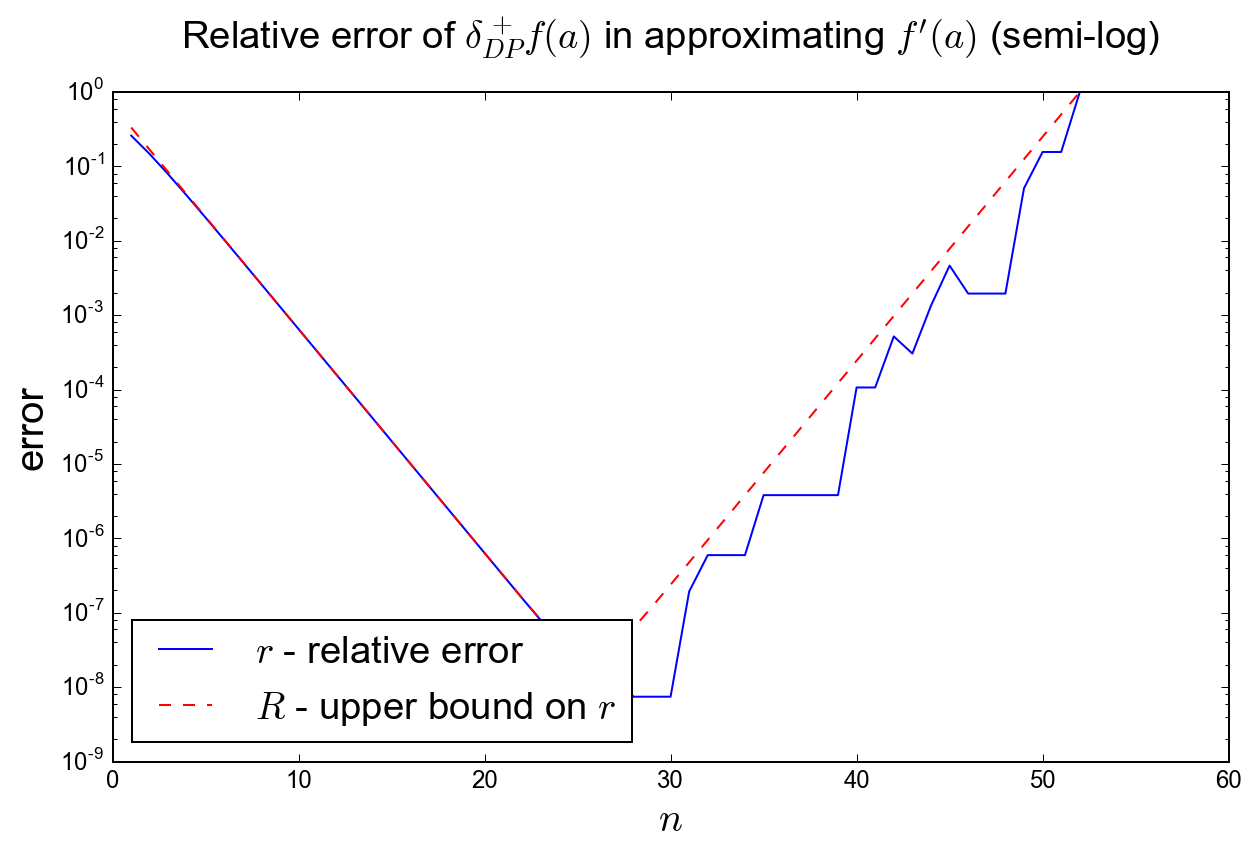

In [3]:
# create a semilogy plot that overlays r versus n with 
# a solid blue line, and R versus n with a red dashed 
# line...

pylab.semilogy(v['n'], v['r'], '-b')
pylab.semilogy(v['n'], v['bigr'], '--r')

pylab.legend(('$r$ - relative error',
              '$R$ - upper bound on $r$'), loc=3)

pylab.xlabel('$n$')
pylab.ylabel('error')
pylab.title('Relative error of $\delta^+_{DP}f(a)$ in approximating $f\'(a)$ (semi-log)', y=1.05)

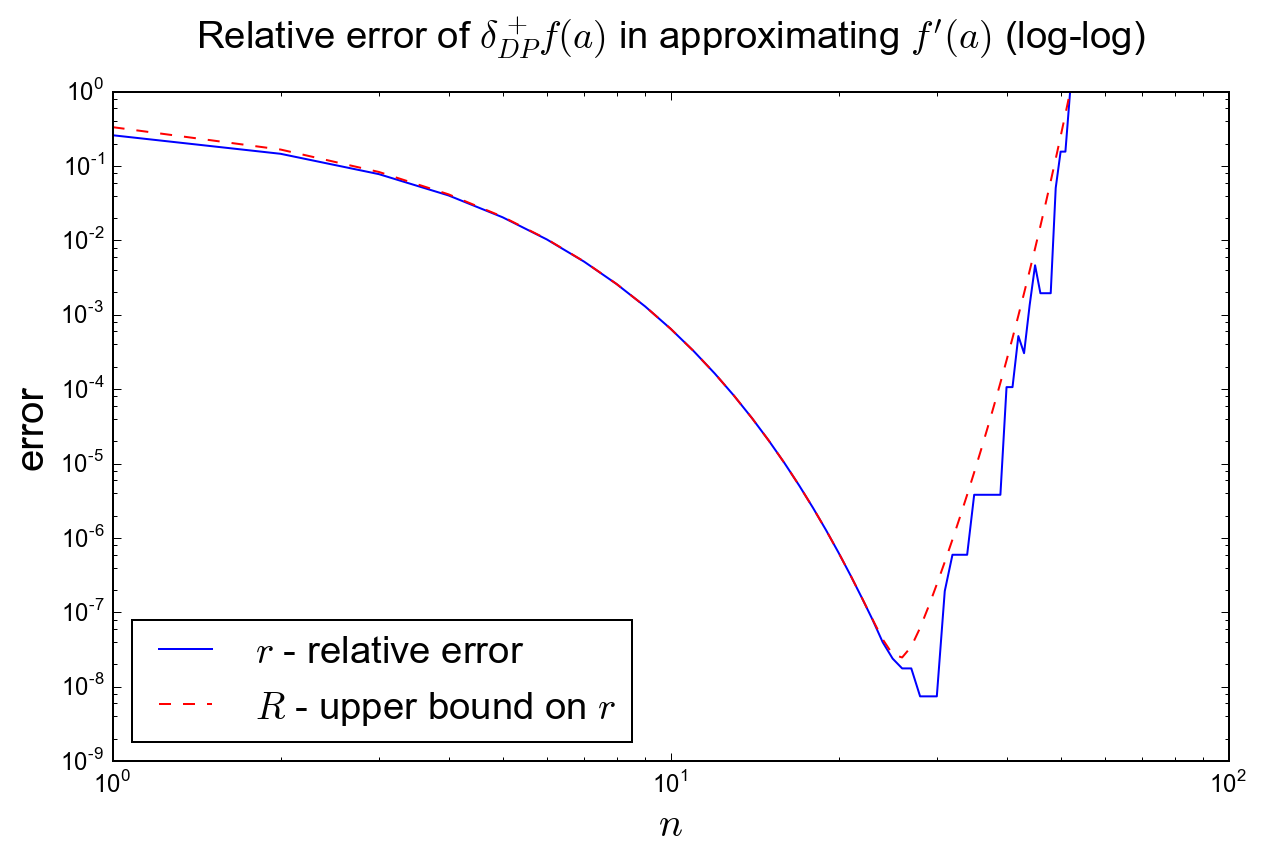

In [4]:
# create a different loglog plot that overlays 
# r versus h with a solid blue line, and 
# R versus h with a red dashed line...

pylab.loglog(v['n'], v['r'], '-b')
pylab.loglog(v['n'], v['bigr'], '--r')

pylab.legend(('$r$ - relative error',
              '$R$ - upper bound on $r$'), loc=3)

pylab.xlabel('$n$')
pylab.ylabel('error')
pylab.title('Relative error of $\delta^+_{DP}f(a)$ in approximating $f\'(a)$ (log-log)', y=1.05)

### Analysis

As the integer $n$ increments, and $h$ as such decreases, the accuracy of the FDE improves until $n$ reaches about the 3/4 point of the interval, and $h$ is still decreasing but not at its smallest value yet. At sufficiently small values of $h$, there may be a loss-of-significance error at any number of steps including: (1) the evaluation of $h$ itself, (2) the evaluation of $a+h$ relative to $a$, or *especially* (3) division by $h$, which causes to grow exponentially which may outpace the numerator of the FDE function when loss-of-significance occurs.

### Conclusion

The arithmetic for this section was markedly simple once past understanding the theory of FDEs and the relatively advanced error calculation when considering double point error, etc.